In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
Stats_df = pd.read_csv('nba_2017_players_with_salary_wiki_twitter.csv')


Since the invention of basketball more than 120 years ago, The evolution of the game has undergone a lot of changes throughout it's history. From beginning as a game of throwing peaches into a basket with only 13 rules, the game today is arguably the most popular indoor game and one of the top attractions globally in sports. The NBA today has over 100 rules, and the way the game is played has undergone many transformations over the years. One could argue that Michael Jordan set the standard for what characteristics the ideal NBA player would have in the 90s, showing an incredible combination of speed, skill, and physical prowess to dominate the league for years. The game today has changed since then, with teams prioritizing strong 3 point shooting skill higher than ever before. League wide, the NBA has hired full time data analytics departments to help the front office make decisions on which players they should target in free agency, and help the staff coach their players. Some people argue that the introduction of data analytics into the NBA is a main cause of this change. But does the data show that on average, 3 point shooting leads to more points than 2 point shooting? Is 3 point shooting correlated to a player's on-court offensive real plus-minus score?  Lastly, we will compare the 3 point shooting of two different positions to see if we can conclude meaningful differences in their distributions.

Let's take a look at our data set.

In [21]:
Stats_df.head()

,Unnamed: 0,Rk,PLAYER,POSITION,AGE,MP,FG,FGA,FG%,3P,...,DRPM,RPM,WINS_RPM,PIE,PACE,W,SALARY_MILLIONS,PAGEVIEWS,TWITTER_FAVORITE_COUNT,TWITTER_RETWEET_COUNT
0,0,1,Russell Westbrook,PG,28,34.6,10.2,24.0,0.425,2.5,...,-0.47,6.27,17.34,23.0,102.31,46,26.50,4279.0,2130.5,559.0
1,1,2,James Harden,PG,27,36.4,8.3,18.9,0.440,3.2,...,-1.57,4.81,15.54,19.0,102.98,54,26.50,3279.0,969.0,321.5
2,2,4,Anthony Davis,C,23,36.1,10.3,20.3,0.505,0.5,...,3.90,4.35,12.81,19.2,100.19,31,22.12,82.5,368.0,104.0
3,3,6,DeMarcus Cousins,C,26,34.2,9.0,19.9,0.452,1.8,...,0.64,4.20,11.26,17.8,97.11,30,16.96,1625.5,102.0,91.5
4,4,7,Damian Lillard,PG,26,35.9,8.8,19.8,0.444,2.9,...,-1.49,3.14,10.72,15.9,99.68,38,24.33,1830.5,186.5,43.0


Let's take a look at the distributions for 3 point and 2 point shooting across the NBA among players that attempt at least 1 FG per game.

Text(0.5,0,'%')

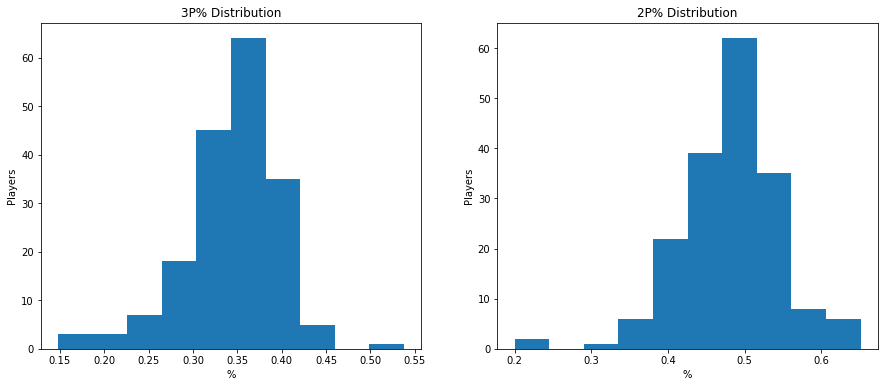

In [22]:
NewStats_df = Stats_df[Stats_df['3PA']>=1]
NewStats_df = NewStats_df[NewStats_df['2PA']>=1]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.hist(NewStats_df['3P%'])
plt.title('3P% Distribution')
plt.ylabel('Players')
plt.xlabel('%')

plt.subplot(1,2,2)
plt.hist(NewStats_df['2P%'])
plt.title('2P% Distribution')
plt.ylabel('Players')
plt.xlabel('%')


Let's perform some basic statistical analysis on the data to establish central tendency.

In [23]:
Three_mean = sum(NewStats_df['3P%']) / NewStats_df['3P%'].count()
Three_median = NewStats_df['3P%'].median()
Two_mean = sum(NewStats_df['2P%']) / NewStats_df['2P%'].count()
Two_median = NewStats_df['2P%'].median()
print("The average Field Goal Percentage of 3 Pointers in the NBA is {}.".format(Three_mean))
print("The median Field Goal Percentage of 3 Pointers in the NBA is {}.".format(Three_median))
print("The average Field Goal Percentage of 2 Pointers in the NBA is {}.".format(Two_mean))
print("The median Field Goal Percentage of 2 Pointers in the NBA is {}.".format(Two_median))

#Multiplying by amount of points to get the average result of a shot attempt
Two_Score = Two_mean * 2
Three_Score = Three_mean * 3

print ("The average 2 point shot results in {} points".format(Two_Score))
print ("The average 3 point shot results in {} points".format(Three_Score))


The average Field Goal Percentage of 3 Pointers in the NBA is 0.34533149171270705.
The median Field Goal Percentage of 3 Pointers in the NBA is 0.354.
The average Field Goal Percentage of 2 Pointers in the NBA is 0.47911602209944726.
The median Field Goal Percentage of 2 Pointers in the NBA is 0.481.
The average 2 point shot results in 0.9582320441988945 points
The average 3 point shot results in 1.0359944751381212 points


It's interesting to see that for players that attempt at least 1 3 pointer per game, on average a 3 point shot attempt results in slightly more points than a 2 point shot attempt. This data supports the NBA's trend towards prioritizing more 3 point shooting in recent years.

For both 3p and 2p shooting, the median is slightly higher than the mean, and the histogram shows us that there may be a few players that are dragging down the mean acting as lower bound outliers. Let's plot a box plot to take a further look.

Text(0,0.5,'2P%')

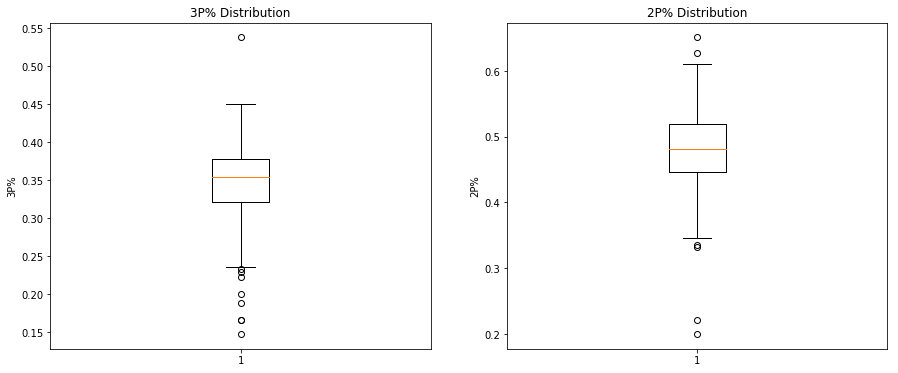

In [24]:
plt.figure(figsize =(15,6))
plt.subplot(1,2,1)
plt.boxplot(NewStats_df['3P%'])
plt.title('3P% Distribution')
plt.ylabel('3P%')

plt.subplot(1,2,2)
plt.boxplot(NewStats_df['2P%'])
plt.title('2P% Distribution')
plt.ylabel('2P%')

The box plots confirm there are some data points acting as lower bound outliers dragging down the mean in the distribution. This is especially the case in 2 point shooting, with a few data points below 0.3, a sizeable distance below the mean and median of 0.479 and 0.481 respectively.

Now let's take a look to see if there's any correlation between 3 point shooting percentage and RPM (Real plus-minus). First, let's define what real plus minus rating is. RPM is a measure of the effect a player has on the overall score of the game when he is on the floor. For example - If your RPM is +1, then throughout the season when you are on the court, your team has scored 1 more point than they have allowed. 

ORPM - A player's Real plus-minus on the offensive end of the court.

DRPM - A player's Real plus-minus on the defensive end of the court.

Because a player is only shooting on the offensive end of the floor, it makes sense to use the ORPM score when analyzing correlation with 3P%. 

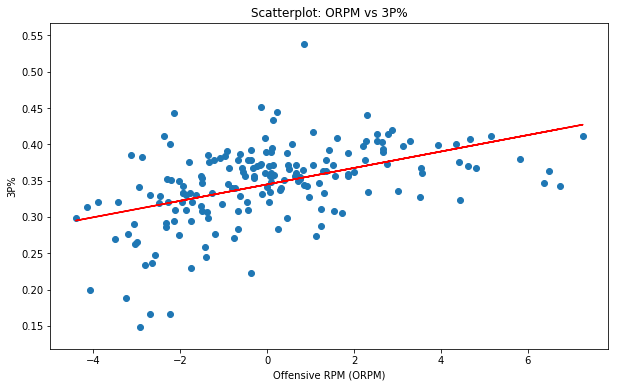

In [25]:
plt.figure(figsize=(10,6))

x = NewStats_df['ORPM']
y = NewStats_df['3P%']

p1 = np.polyfit(x,y,1)
plt.scatter(x,y)
plt.plot(x,np.polyval(p1,x),'r-')
plt.title('Scatterplot: ORPM vs 3P%')
plt.ylabel('3P%')
plt.xlabel('Offensive RPM (ORPM)')
plt.show()

This scatterplot shows us the relationship between 3 point shooting and a player's Offensive Real Plus Minus rating. You can see that there are only a handful of data points with a positive ORPM and a 3P% lower than 0.30, and the line of best fit curve shows a linear relationship indicating that if a player has a higher 3P% they are more likely to have a higher ORPM score. As a result, you can understand why teams are much more interested in a player if they can achieve a strong 3P% as it is more likely for them to improve the team overall when they are on the court.

Lets take a look at how 3P% breaks down per position in the NBA.

In [26]:
PG_3p = NewStats_df.loc[NewStats_df['POSITION'] == 'PG', '3P%']
SG_3p = NewStats_df.loc[NewStats_df['POSITION'] == 'SG', '3P%']
SF_3p = NewStats_df.loc[NewStats_df['POSITION'] == 'SF', '3P%']
PF_3p = NewStats_df.loc[NewStats_df['POSITION'] == 'PF', '3P%']
C_3p = NewStats_df.loc[NewStats_df['POSITION'] == 'C', '3P%']
PG_mean = sum(PG_3p) / PG_3p.count()
SG_mean = sum(SG_3p) / SG_3p.count()
SF_mean = sum(SF_3p) / SF_3p.count()
PF_mean = sum(PF_3p) / PF_3p.count()
C_mean = sum(C_3p) / C_3p.count()
print('The average 3P% for Point Guards is {}'.format(PG_mean))
print('The average 3P% for Shooting Guards is {}'.format(SG_mean))
print('The average 3P% for Small Forwards is {}'.format(SF_mean))
print('The average 3P% for Power Forwards is {}'.format(PF_mean))
print('The average 3P% for Centers is {}'.format(C_mean))

The average 3P% for Point Guards is 0.3551777777777777
The average 3P% for Shooting Guards is 0.36056818181818173
The average 3P% for Small Forwards is 0.3330232558139534
The average 3P% for Power Forwards is 0.31993939393939386
The average 3P% for Centers is 0.36118749999999994


Let's take a look at the distribution of Small Forwards and Power Forwards 3P shooting percentage.

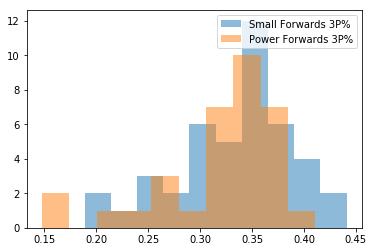

In [29]:
plt.hist(SF_3p, alpha=0.5, label='Small Forwards 3P%') 
plt.hist(PF_3p, alpha=0.5, label='Power Forwards 3P%') 
plt.legend(loc='upper right') 
plt.show()

When analyzing this visual, it appears that Small Forwards have a higher 3P shooting percentage than Power forwards. Let's run a t-test to test that hypothesis.

In [27]:

#Calculcate the mean difference
diff = SF_mean - PF_mean
#Create an array of sample size and standard deviation
size = np.array([len(SF_3p),len(PF_3p)])
sd = np.array([SF_3p.std(),PF_3p.std()])

#Standard Error calculation 
diff_se = (sum(sd**2/size))**.5

print(diff/diff_se)

0.9758402416922731


In [28]:
from scipy.stats import ttest_ind
print(ttest_ind(PF_3p, SF_3p, equal_var=False))

Ttest_indResult(statistic=-0.9758402416922775, pvalue=0.3325952877920112)


We have a very high p-value of 0.33 which is larger than the alpha value of 0.05 meaning that we cannot conclude a meaningful difference exists between the two distributions. 

Potential bias in the above analysis is that we are only analyzing players that take at least 1 3 point shot per game. In the NBA, Power Forwards generally play closer to the basket and as a result take less 3 pointers, meaning there could be a significant difference in the sample sizes chosen. it is likely that there are more players in the Small Forward data set, and this could be throwing off our analysis.

In terms of future analysis, looking at the evolution of 3 point shooting in the NBA would be very interesting by comparing data sets from different years. It would be interesting to see if there is any correlation between the volume of 3 pointers a team is shooting and their RPM and overall wins spanning several seasons. In addition, it would be interesting to see how 3 point shooting has evolved over several years by position in the NBA. I would hypothesize that as you get closer to present day, the Power Forward and Center positions would see the biggest increase in volume and % from 3 point range.